In [105]:
import random
import numpy as np
import sympy as sp
import math
from Crypto.Util import number
import time
 


In [52]:
# is prime
def is_prime(n):
    if n == 2:
        return True
    if n % 2 == 0 or n <= 1:
        return False
    for i in range(3, int(n**0.5)+1, 2):
        if n % i == 0:
            return False
    return True

#powmod
def powmod(a, b, c):
    res = 1
    while b > 0:
        if b & 1:
            res = (res * a) % c
        b >>= 1
        a = (a * a) % c
    return res



import sys, threading
from math import sqrt,floor
sys.setrecursionlimit(10**7)
threading.stack_size(2**27)

def ConvertToInt(message_str):
  res = 0
  for i in range(len(message_str)):
    res = res * 256 + ord(message_str[i])
  return res

def ConvertToStr(n):
    res = ""
    while n > 0:
        res += chr(n % 256)
        n //= 256
    return res[::-1]
print(ConvertToStr(ConvertToInt('Number Theory')))

def GCD(a, b):
  if b == 0:
    return a
  return GCD(b, a % b)

def ExtendedEuclid(a, b):
    if b == 0:
        return (1, 0)
    (x, y) = ExtendedEuclid(b, a % b)
    k = a // b
    return (y, x - k * y)

# this is an R2L recursive implementation that works for large integers
def PowMod(a, n, mod): 
    if n == 0:
        return 1 % mod
    elif n == 1:
        return a % mod
    else:
        b = PowMod(a, n // 2, mod)
        b = b * b % mod
        if n % 2 == 0:
          return b
        else:
          return b * a % mod

def InvertModulo(a, n):
    (b, x) = ExtendedEuclid(a, n)
    if b < 0:
        b = (b % n + n) % n # we don't want -ve integers
    return b



Number Theory


In [99]:

temp=3
#is temp prime


def RSA(n_bits):
    p = number.getPrime(n_bits // 2)
    q = number.getPrime(n_bits // 2)
    while p == q:
        q = number.getPrime(n_bits // 2)

    
    # p = random.randint(np.power(2,(n_bits//2 -1)),np.power(2,(n_bits//2)))
    # print(p)
    # while not sp.isprime(p):
    #     p = random.randint(np.power(2,(n_bits//2 -1)),np.power(2,(n_bits//2)))

    # q=random.randint(np.power(2,(n_bits//2 -1)),np.power(2,(n_bits//2)))
    # while not sp.isprime(q) or q==p:
    #     q=random.randint(np.power(2,(n_bits//2 -1)),np.power(2,(n_bits//2)))


    n=p*q
    phi=(p-1)*(q-1)
    e=random.randint(2,phi)
    while sp.gcd(e,phi) != 1:
        e=random.randint(2,phi) 

    d=sp.mod_inverse(e,phi)
    pu=e,n
    pr=d,n
    return pu,pr

def Encrypt(message,pu):
    e,n=pu
    return PowMod(message,e,n)

def Decrypt(cipher,pr):
    d,n=pr
    return PowMod(cipher,d,n)

In [107]:
(e,n),(d,n)=RSA(1024)
#max is str length
message="A"
messge_int=ConvertToInt(message)
st = time.time()

cipher=Encrypt(messge_int,(e,n))
et=time.time()
print("Encryption time:",et-st)
print(cipher)
decrypted=Decrypt(cipher,(d,n))
print(ConvertToStr(decrypted))





Encryption time: 0.0047605037689208984
65349928792798747451420824101931828713120614685458679323052371741932518981941866365789169873121207722730037516706225030349907118438995540481305212759837140459693449029893425839368240581812335979021084449882731143050121055586775962479428375127674996043482736610408307059558599939561389935872620057195153149998
A


In [129]:
message="A"
message_int=ConvertToInt(message)

#make x linspace of range 1 to 1024
low=8
end=512
x=np.linspace(low,end,end-low+1)
print(x[:200])
y=[]

keys=[]
for i in x:
    (e,n),(d,n)=RSA(int(i))
    keys.append((e,n))
    
   


[  8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.
  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.
  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.
  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.
  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.
  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.
  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105.
 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119.
 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133.
 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161.
 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 175.
 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187. 188. 189.
 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202. 203.
 204. 

In [130]:
counter=0

for i in x:
    elapsed_time=0
    (e,n)=keys[counter]
    for j in range(100):
        
        st=time.time()
        cipher=Encrypt(message_int,(e,n))
        et=time.time()
        elapsed_time+=(et-st)
    y.append(elapsed_time/100)
    counter+=1
    

In [131]:
import matplotlib.pyplot as plt


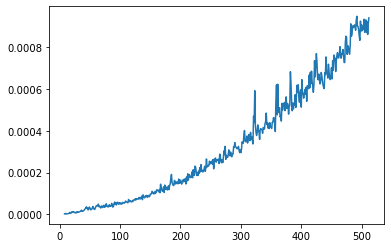

In [132]:
plt.plot(x, y)
plt.show()

In [145]:
#break RSA
def break_RSA(pu):
    e,n=pu
    #get p,q
    for i in range(2,n//2):
        if n%i==0:
            p=i
            q=n//i
            break
    


    return p,q

(pu,_)=RSA(32)
print(pu)
p,q=break_RSA(pu)
assert(p*q==pu[1])

(965365565, 1517849297)


In [157]:

keys_to_break=[]

lower_range=8
upper_range=50
for i in range(lower_range,upper_range):
    (e,n),(d,n)=RSA(int(i))
    keys_to_break.append((e,n))

counter=0
time_array=[]
for i in range(lower_range,upper_range):
    time_taken=0
    #for k in range(1,2):
    st=time.time()
    p,q=break_RSA(keys_to_break[counter])
    et=time.time()
    time_taken=(et-st)
    time_array.append(time_taken)
    print(i,time_taken)
        
    counter+=1


    
 

8 1.1920928955078125e-05
9 1.2636184692382812e-05
10 1.1682510375976562e-05
11 1.52587890625e-05
12 1.6927719116210938e-05
13 1.6689300537109375e-05
14 4.982948303222656e-05
15 5.030632019042969e-05
16 5.435943603515625e-05
17 5.698204040527344e-05
18 8.7738037109375e-05
19 5.5789947509765625e-05
20 0.00020194053649902344
21 0.00011801719665527344
22 0.00028586387634277344
23 0.000274658203125
24 0.0006403923034667969
25 0.0006568431854248047
26 0.0016717910766601562
27 0.0014438629150390625
28 0.003482818603515625
29 0.0032579898834228516
30 0.00396728515625
31 0.006511688232421875
32 0.02897167205810547
33 0.02085113525390625
34 0.04387521743774414
35 0.039266109466552734
36 0.07845735549926758
37 0.08047604560852051
38 0.12451338768005371
39 0.1885981559753418
40 0.33696722984313965
41 0.3465845584869385
42 0.6033718585968018
43 0.7876477241516113
44 1.2721836566925049
45 1.4328696727752686
46 1.9793024063110352
47 1.723465919494629
48 3.803248643875122
49 4.972323894500732


(42,)
(42,)


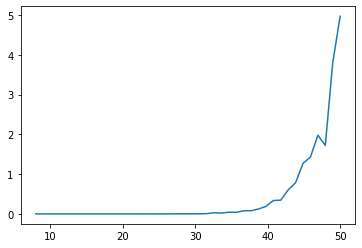

In [158]:
x_break=np.linspace(lower_range,upper_range,upper_range-lower_range)
print(x_break.shape)
print(np.array(time_array).shape)

plt.plot(x_break,time_array)
plt.show()